In [23]:
%matplotlib inline
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

file = 'filtered_otomoto.json'
with open(file) as datafile:
    dataset = json.load(datafile)
    
KEYS = ['mileage', 'price', 'production_year']
dataframe = pd.DataFrame.from_dict(dataset)
dataframe = dataframe.filter(KEYS)
dataframe = dataframe.dropna()
dataframe[['mileage', 'production_year']] = dataframe[['mileage', 'production_year']].astype(float)



LABELS = ['mileage', 'price', 'production_year', 'brand', 'label', 'type', 'transmission']
dataset = pd.DataFrame.from_dict(dataset).filter(LABELS)


In [65]:
audi_df = dataset.loc[dataset['brand'] == 'Audi'].filter(LABELS)
audi_df['type'] = audi_df['type'].fillna('N/A')
audi_df['transmission'] = audi_df['transmission'].fillna('N/A')
audi_df_copy = audi_df.dropna()
audi_df = audi_df.drop(columns=['brand', 'label'])
audi_df['type'] = audi_df['type'].astype('category')
audi_df['transmission'] = audi_df['transmission'].astype('category')

audi_dummy_df = pd.get_dummies(audi_df)
audi_dummy_df.keys()
audi_dummy_df = audi_dummy_df.drop(columns=['type_N/A', 'transmission_N/A'])
audi_dummy_df = audi_dummy_df.dropna()

audi_dummy_df

,mileage,price,production_year,type_Auta małe,type_Auta miejskie,type_Coupe,type_Kabriolet,type_Kombi,type_Kompakt,type_Minivan,type_SUV,type_Sedan,transmission_Automatyczna bezstopniowa (CVT),"transmission_Automatyczna dwusprzęgłowa (DCT, DSG)",transmission_Automatyczna hydrauliczna (klasyczna),transmission_Manualna,"transmission_Półautomatyczna (ASG, Tiptronic)"
7,65000.0,164900,2013.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
14,247654.0,13350,2003.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
19,191658.0,24999,2006.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21,13000.0,189000,2017.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
23,80000.0,73900,2014.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
29,9182.0,189000,2017.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
32,5.0,189637,2017.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48,249000.0,39000,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
63,260000.0,10400,2000.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
64,172800.0,55000,2008.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
tsne = TSNE()
tsne_results = tsne.fit_transform(audi_dummy_df)

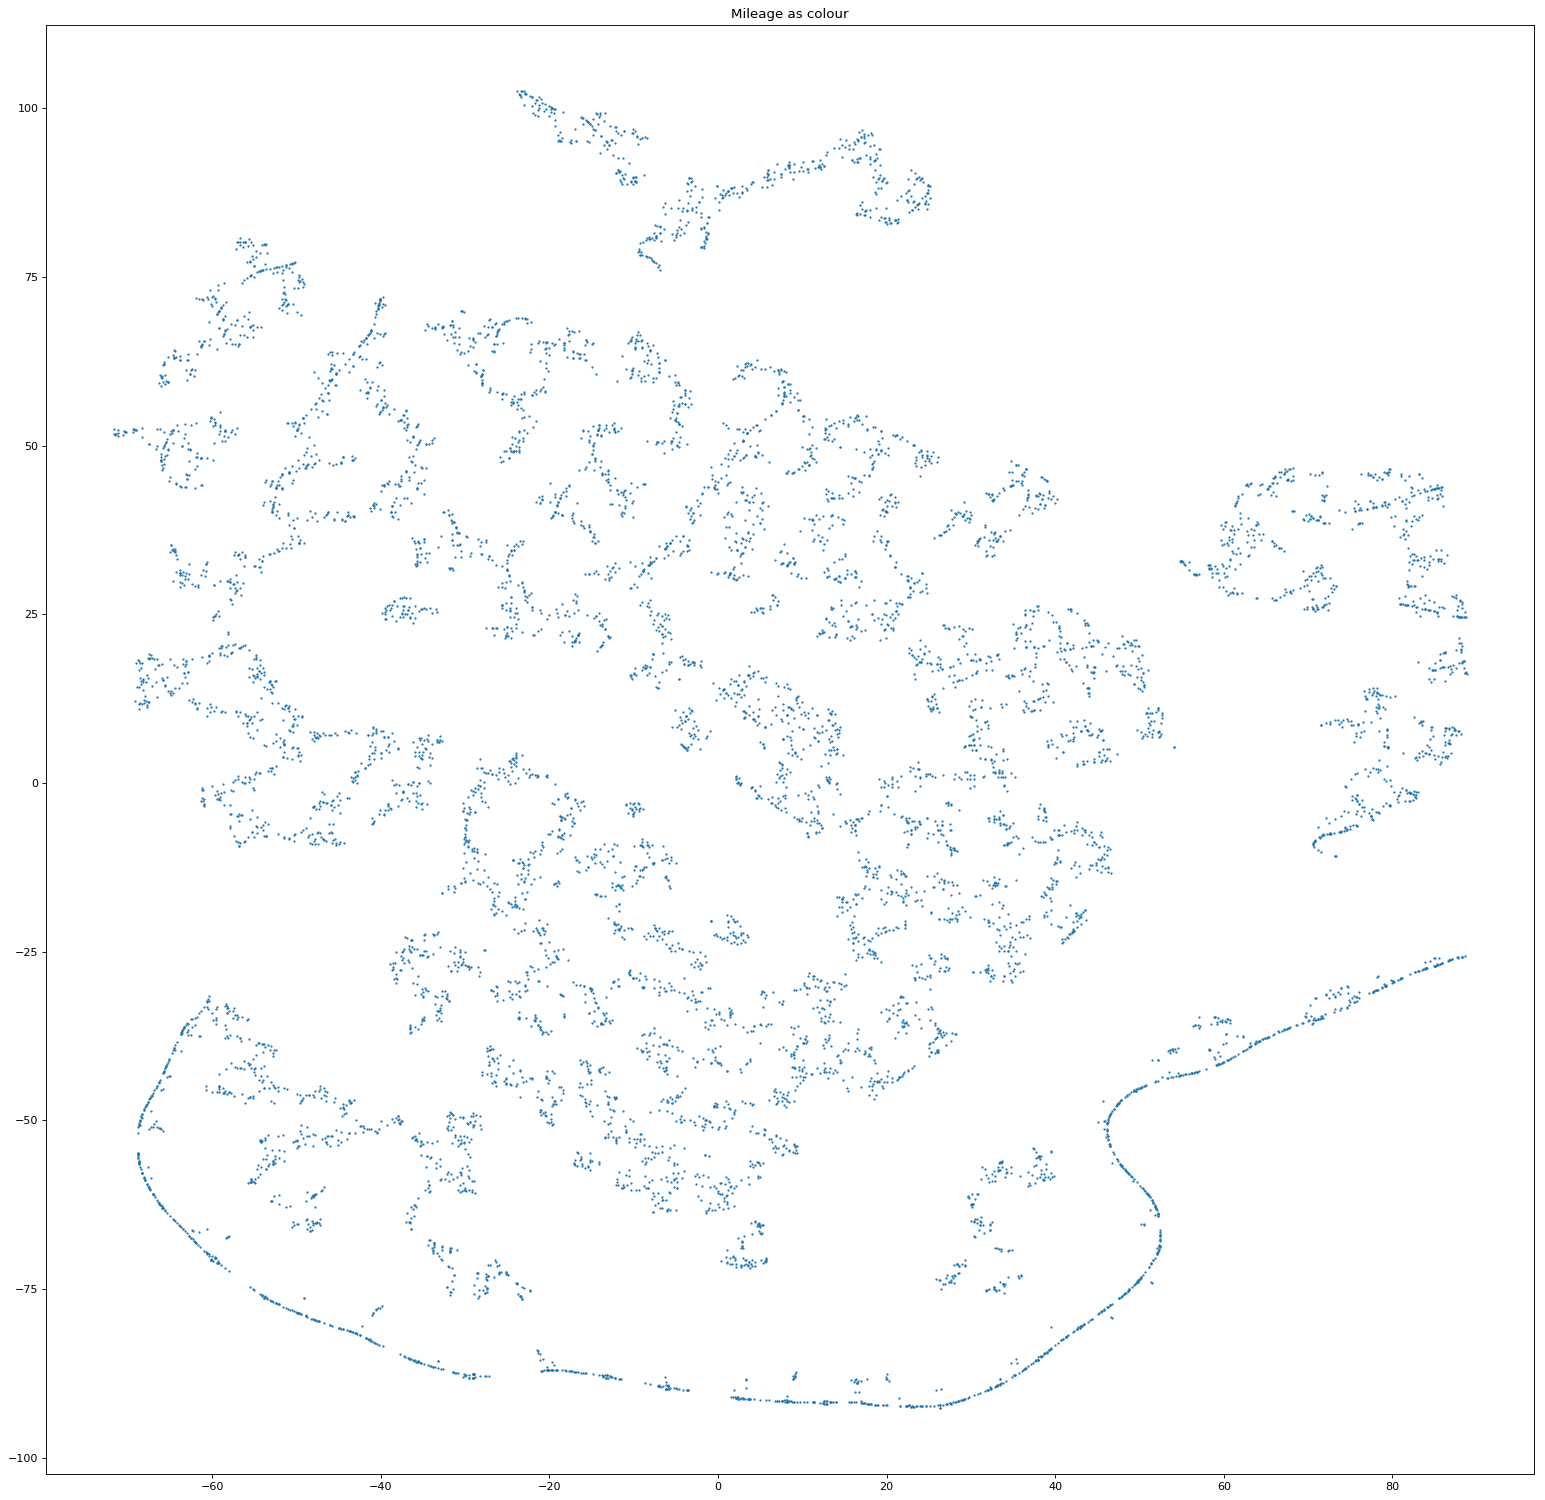

In [60]:
fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(
    x=tsne_results[:,0], y=tsne_results[:,1], s=1
)
ax.set_title("Mileage as colour")
plt.show()

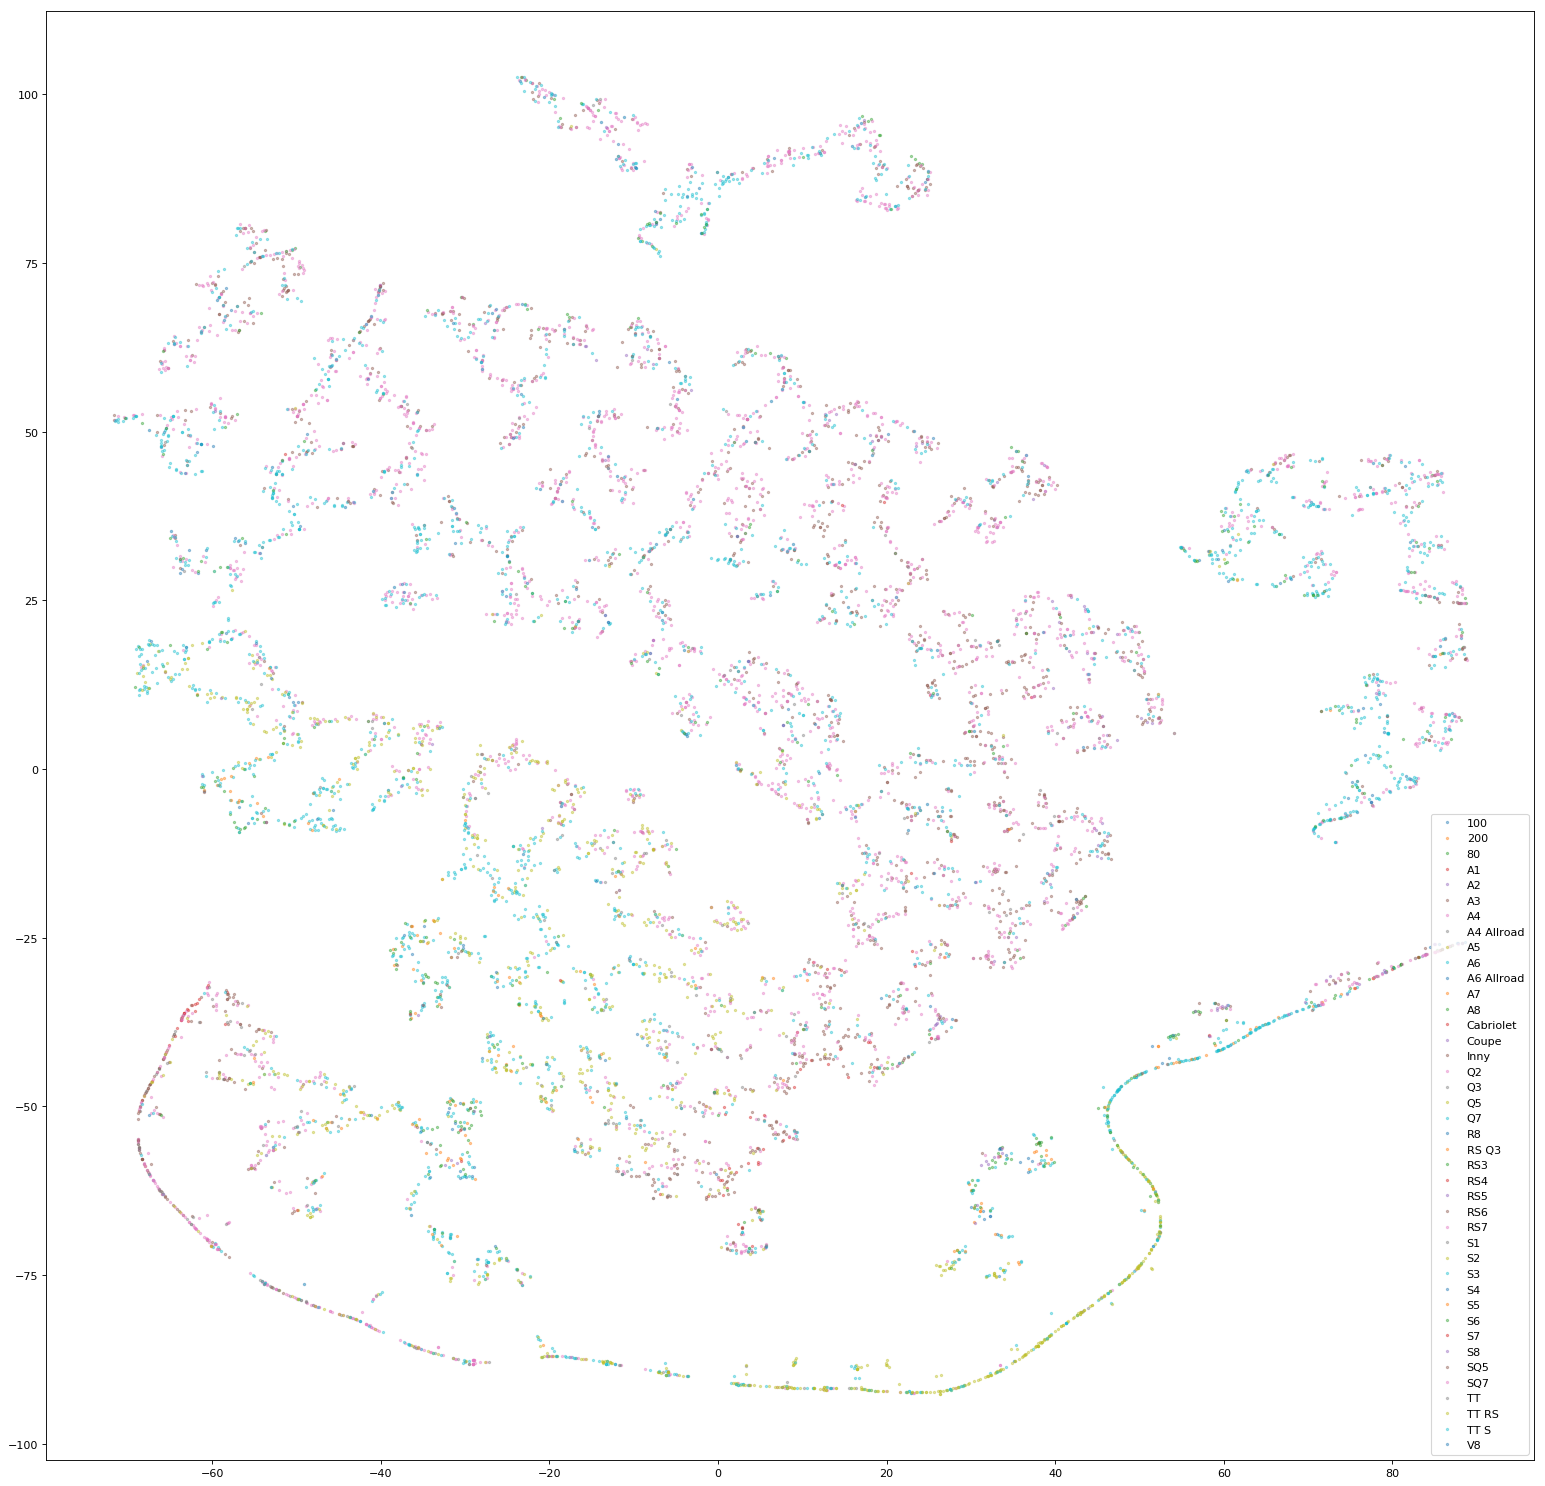

In [74]:
results_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], model=audi_df_copy['label']))
results_df.model = results_df.model.map(lambda x: x.replace('Osobowe ', ''))
groups = results_df.groupby('model')
MODELS = results_df.model.unique();

fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')

for name, group in groups:
    if name in MODELS:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name, alpha=0.4)
ax.legend()
plt.show()

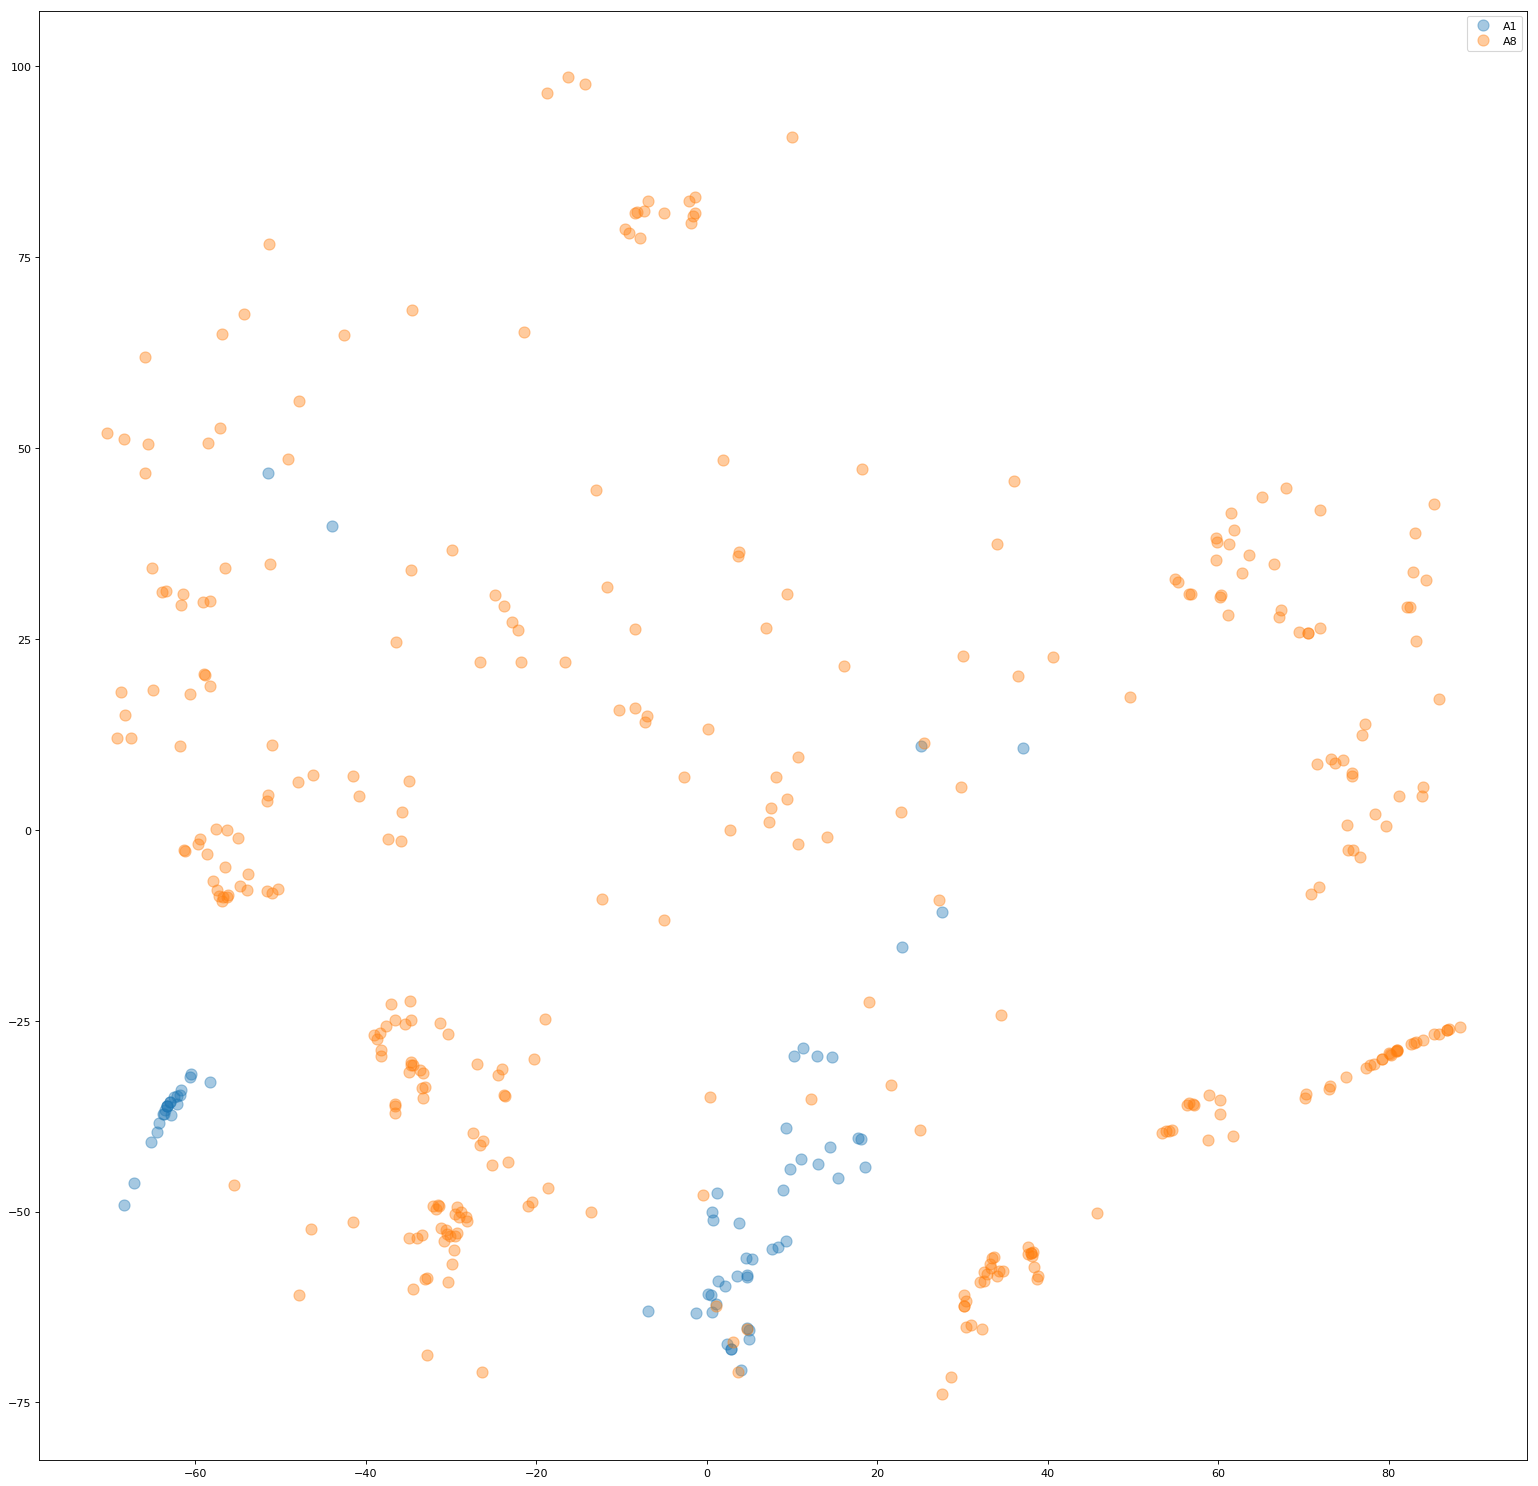

In [77]:
MODELS = ['A1', 'A8']

results_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], model=audi_df_copy['label']))
results_df.model = results_df.model.map(lambda x: x.replace('Osobowe ', ''))
groups = results_df.groupby('model')

fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')

for name, group in groups:
    if name in MODELS:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=name, alpha=0.4)
ax.legend()
plt.show()

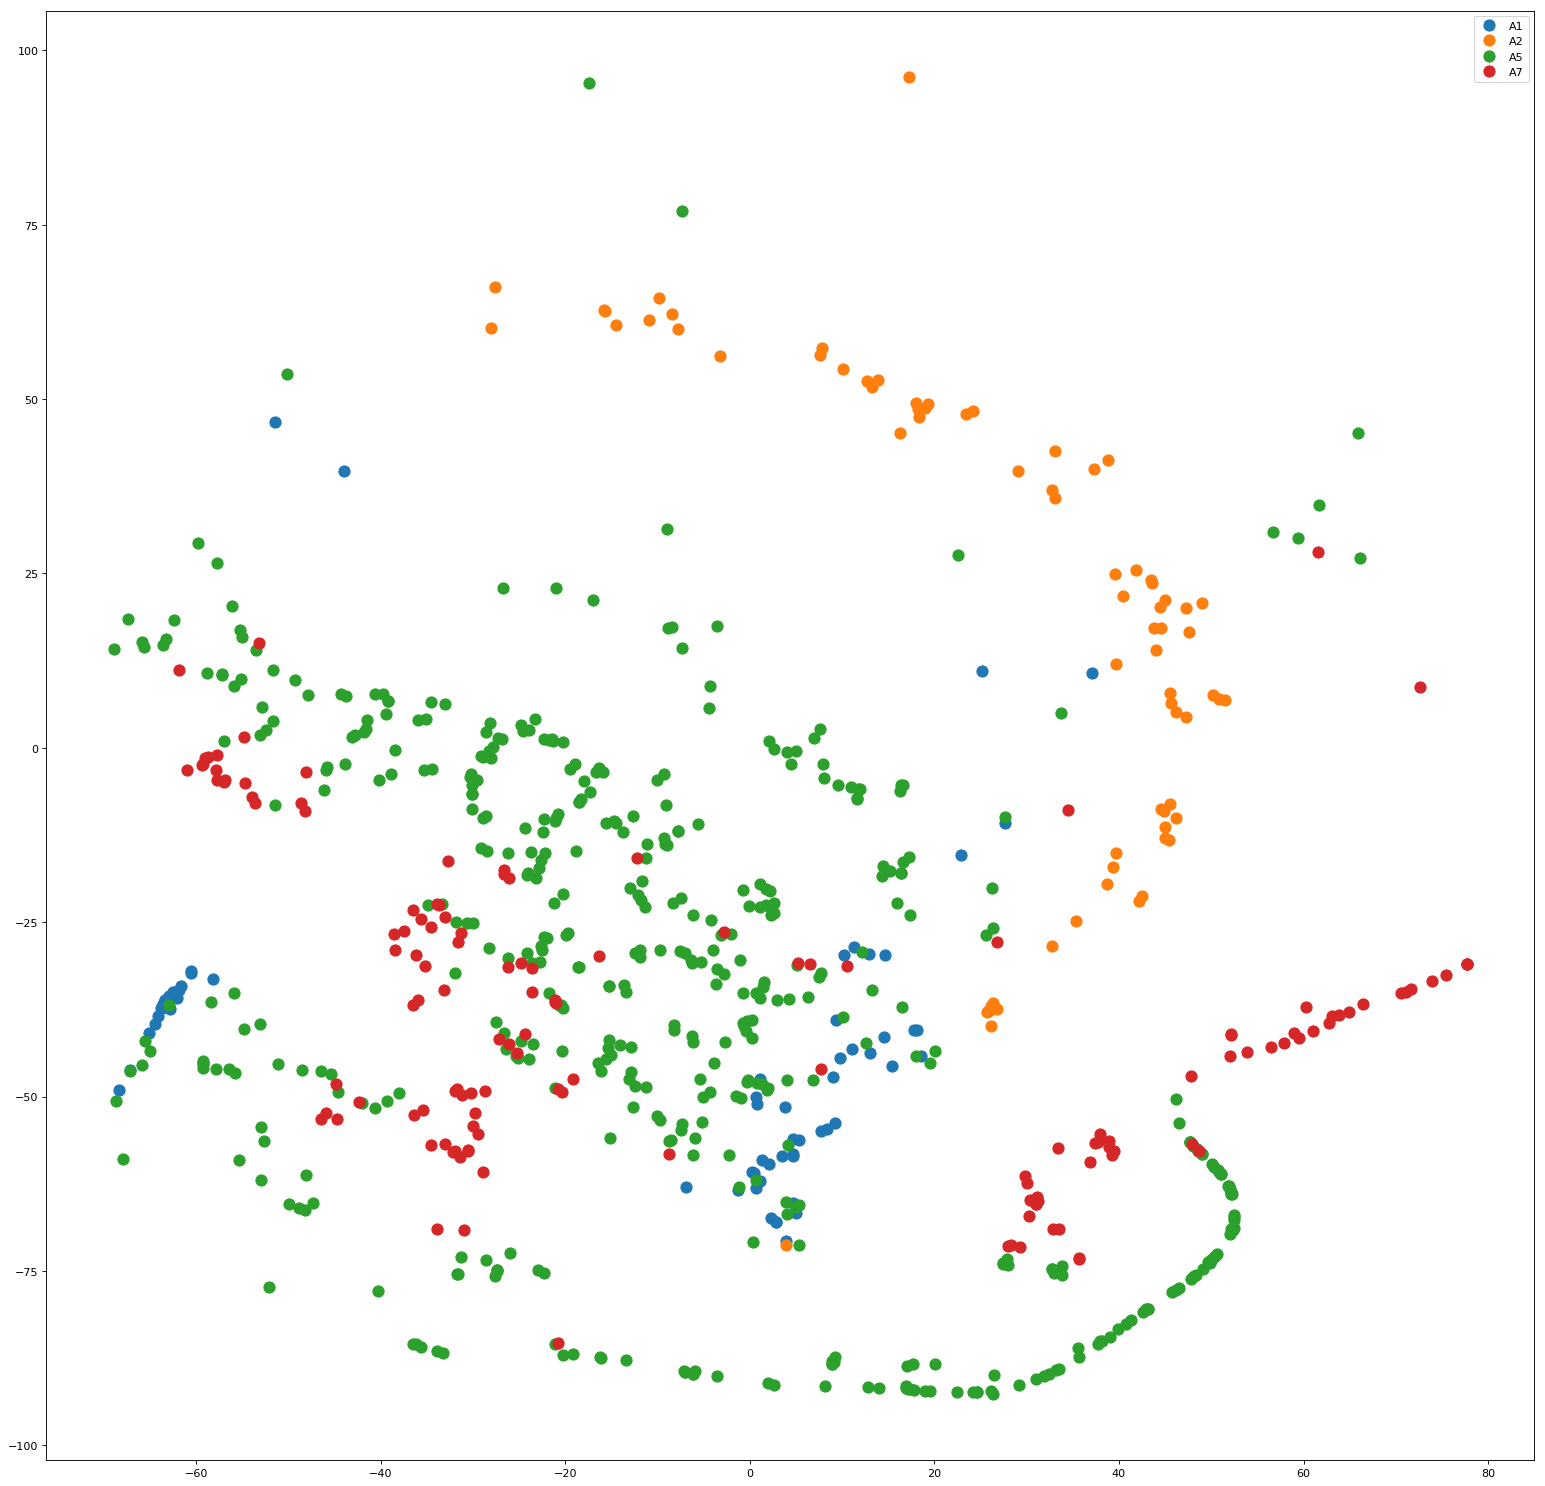

In [93]:
MODELS = ['A1', 'A2', 'A5', 'A7']

results_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], model=audi_df_copy['label']))
results_df.model = results_df.model.map(lambda x: x.replace('Osobowe ', ''))
groups = results_df.groupby('model')

fig, ax = plt.subplots(figsize=(24, 24), dpi=80, facecolor='w', edgecolor='k')

for name, group in groups:
    if name in MODELS:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=name, alpha=1)
ax.legend()
plt.show()